# Littlemore Parish Council LTN questionnaire analysis

## Data collection

Data was collected in October 2021 via distributing paper copies of this questionnaire (TODO: link to questionnaire). Questionnaires were only distributed to those who were in when we knocked on the door then we went round a second time to pick them up. From experience, this gets significantly better engagement than simply dropping the questionnaire through the door with no interaction. 

We decided to not use an online option as 
- easy to brigade (i.e. spam with multiple responses)
- more difficult to get good geographic coverage throughout Littlemore
- not as accessible for older people
- expected lower engagement, with only the most engaged already taking part

Limitations:

- Flats were difficult to do so we have poor coverage here
- We did not have time nor the man power to visit multiple times so there will be a bias to those who are in early evening (5-7pm ish)

## Anonymisation (TODO)

To make it impossible (as far as possible) to not identify individuals from the data. 

Only identifiable data is street name (collected no demographic data like age) so we bundle streets together geographically if there are less than [TODO] responses for a single street. This has been done before this notebook - this notebook works on the anonymised data.

## Notes on specific questions


### Question 2

Raw numbers difficult to use without knowing number of people in household. 

### Question 3 

Unsure if people are filling this in as intented (i.e. missing the "driving" aspect). Should've been more carefully worded. Needed a "don't drive" box. 

### Question 4

A number of people missed this question; placement right at the top of the page made it less obvious?

### Question 7 and 8

Some normalisation happened here when transcribing *e.g.*
- "It takes a long time to get to my destination" -> "Longer journeys"
- Mapped a lot of related things to "traffic displacement" 

This was to:
- Make it easier and quicker to input, without losing data
- Make it easier to analyse later

### Question 10

A lot of people used this for expanding on Question 8 (problem with LTN) rather than thinking of other solutions. Negatives of the LTN were moved to Question 8 responses. Similar to the free-text fields of Questions 7 and 8, some paraphrasing took place. 

## Bad data

Only spotted a couple of obvious duplicates (same hand writing, same pen, very similar content, same road). These were removed from the data. 

## Missed opportunities

Should've asked:
- number of people in household
- number of cars in household
- age data


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = 'responses_20211030.csv'
street_counts = 'data/street_counts.csv'

## Clean up column names so don't have to deal with spaces

In [11]:
df = pd.read_csv(data)
df = df.rename(columns={
    'Timestamp': 'timestamp',
    'Street or Road Name': 'street', 
    'Email Address': 'email',
    '1: Are you in favour of reducing traffic in Littlemore?': '1_reduce_traffic',
    '2: How many journeys per week do you make - CAR - BEFORE LTN': '2_car_before',
    '2: How many journeys per week do you make - CAR - AFTER LTN': '2_car_after',
    '2: How many journeys per week do you make - MOTORBIKE - BEFORE LTN': '2_motorbike_before',
    '2: How many journeys per week do you make - MOTORBIKE - AFTER LTN': '2_motorbike_after',
    '2: How many journeys per week do you make - VAN - BEFORE LTN': '2_van_before',
    '2: How many journeys per week do you make - VAN - AFTER LTN': '2_van_after',
    '2: How many journeys per week do you make - BUS - BEFORE LTN': '2_bus_before',
    '2: How many journeys per week do you make - BUS - AFTER LTN': '2_bus_after',
    '2: How many journeys per week do you make - FOOT - BEFORE LTN': '2_foot_before',
    '2: How many journeys per week do you make - FOOT - AFTER LTN': '2_foot_after',
    '2: How many journeys per week do you make - WHEELCHAIR etc - BEFORE LTN': '2_wheelchair_before',
    '2: How many journeys per week do you make - WHEELCHAIR etc - AFTER LTN': '2_wheelchair_before',
    '2: How many journeys per week do you make - BIKE - BEFORE LTN': '2_bike_before',
    '2: How many journeys per week do you make - BIKE - AFTER LTN': '2_bike_after',
    '2: How many journeys per week do you make - SCOOTER - BEFORE LTN': '2_scooter_before',
    '2: How many journeys per week do you make - SCOOTER - AFTER LTN': '2_scooter_after',
    '3: If you drive, the reasons for this are:': '3_drive_reasons',
    "4. Overall, the LTN's impact on you has been:": '4_ltn_impact',
    '5. Location of traffic filters: Church Hill Road': '5_filter_church_hill_road',
    '5. Location of traffic filters: Beauchamp Lane': '5_filter_beachamp_lane',
    '5. Location of traffic filters: Littlemore Road': '5_filter_littlemore_road',
    '5. Location of traffic filters: Mayfair Road': '5_filter_mayfair_road',
    '5. Location of traffic filters: Liddell Road': '5_filter_liddell_road',
    '5. Location of traffic filters: Bartholomew Road': '5_filter_bartholomew_road',
    '6: Do you think the current Cowley LTNs should be': '6_ltn_future',
    '7:  What is the biggest benefit of the LTNs?': '7_ltn_benefit',
    '8: What is the biggest problem of the LTNs?': '8_ltn_problem',
    "9: Have you filled in the county's online LTN consultation?": '9_consultation',
    '10. Do you have any other comments or ideas to improve traffic in our area?': '10_traffic_ideas'})          
df.head()

,timestamp,email,street,1_reduce_traffic,2_car_before,2_car_after,2_motorbike_before,2_motorbike_after,2_van_before,2_van_after,...,5_filter_littlemore_road,5_filter_mayfair_road,5_filter_liddell_road,5_filter_bartholomew_road,6_ltn_future,7_ltn_benefit,8_ltn_problem,9_consultation,10_traffic_ideas,Unnamed: 33
0,10/14/2021 20:03:40,anna.railton@gmail.com,Marlborough Close,Yes,0,0,0,0,0,0,...,Agree,Agree,Agree,Agree,Kept as is,Road safety and improved air quality,Not enough of them - disconnected from wider p...,Yes,NaN,NaN
1,10/18/2021 18:26:48,chris@smowton.net,Champion Way / Hardings Close,Yes,5,5,NaN,NaN,NaN,NaN,...,Remove,No opinion,No opinion,Change,Kept with alterations,Some areas became quieter,Displaced traffic,No,NaN,NaN
2,10/18/2021 18:30:18,chris@smowton.net,Champion Way / Hardings Close,NaN,5,5,NaN,NaN,NaN,NaN,...,Remove,NaN,Remove,Remove,NaN,None,More traffic jams,No,Don't see the point of LTNs; make traffic wors...,NaN
3,10/18/2021 18:31:50,chris@smowton.net,Champion Way / Hardings Close,Yes,5,5,0,0,0,0,...,Remove,Change,Change,Remove,Removed,Ride bike safely,Traffic is worse,No,NaN,NaN
4,10/18/2021 18:33:22,chris@smowton.net,Champion Way / Hardings Close,Yes,10,10,50,100,0,0,...,Remove,Remove,Agree,Change,Kept with alterations,Nothing,Everything,No,"Make Bartholomew Road timed, e.g. closed 0730-...",NaN


## Proportions of streets covered

In [4]:
streets = pd.read_csv(street_counts)
freq_count_by_street = df['street'].value_counts().to_frame().reset_index()#.rename(columns={'street':'count'})
freq_count_by_street = freq_count_by_street.rename(columns={'street':'count', 'index':'street'})

In [15]:
coverage = pd.merge(streets, freq_count_by_street, how='left', on=['street']).rename(columns={'count_x': 'total', 'count_y':'num_responses'})
coverage['coverage'] = 100*coverage['num_responses'] / coverage['total']
coverage[coverage['coverage'].notna()].sort_values(by=['coverage'], ascending=False)[['street', 'total', 'num_responses', 'coverage']]

,street,total,num_responses,coverage
22,Fairlie Road,16,14.0,87.500000
38,Long Wall,12,10.0,83.333333
56,Sandford Road,17,12.0,70.588235
50,Pipley Furlong,17,11.0,64.705882
14,Compass Close,14,9.0,64.285714
18,Dudgeon Drive,34,21.0,61.764706
55,Redmoor Close,15,9.0,60.000000
20,Elm Tree Close,10,6.0,60.000000
41,Mayfair Road,55,28.0,50.909091
54,Railway Lane,8,4.0,50.000000


In [6]:
coverage[coverage['num_responses'].isna()].sort_values(by=['coverage'], ascending=False)[['street', 'total', 'num_responses', 'coverage']]

,street,total,num_responses,coverage
0,Addison Drive,19,NaN,NaN
3,Bampton Close,30,NaN,NaN
6,Broadfields,53,NaN,NaN
7,Brocklesby Road,18,NaN,NaN
10,Champion Way,50,NaN,NaN
17,Denny Gardens,48,NaN,NaN
19,Eastern Avenue,64,NaN,NaN
21,Faber Close,8,NaN,NaN
23,Giles Close,11,NaN,NaN
24,Giles Road,63,NaN,NaN


In [7]:
set(freq_count_by_street['street']).difference(set(coverage[coverage['num_responses'].notna()]['street']))  # Street names we can't deal with

{'Champion Way / Hardings Close', 'Grange Road '}

<AxesSubplot:>

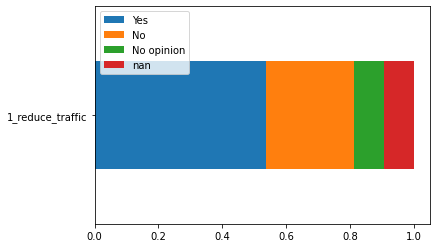

In [33]:
reduce_traffic_df = pd.DataFrame(df['1_reduce_traffic'].value_counts(dropna=False, normalize=True)).transpose()
reduce_traffic_df.plot.barh(stacked=True)
# TODO put labels and proportions on bar chart

## Clean up data from question 2

- Where we have data like `1-2`, replace with average of two values
- Other strings, replace with `1` to indicate non-negative usage

In [49]:
def average_usage_range(input_: str) -> float:
    if isinstance(input_, str) and '-' in input_:
        bottom, top = input_.split('-')
        return (int(bottom) + int(top)) / 2
    return input_

list(map(average_usage_range, ['5-10', 'NaN', '5', 'Yes']))

[7.5, 'NaN', '5', 'Yes']

In [62]:
def get_zeros(input_: str) -> float:
    if isinstance(input_, str) and '0' in input_:
        return 0
    return input_

list(map(get_zeros, ['0 (moved in before LTN)', '(0 because moved in after installation)', '5', 'Yes']))

[0, 0, '5', 'Yes']

In [54]:
def drop_reason(input_: str) -> float:
    if isinstance(input_, str) and ' (' in input_:
        try:
            return float(input_.split(' (')[0])
        except ValueError:
            pass
        
    return input_

list(map(drop_reason, ['0 (moved in before LTN)', '5 (taxi)', '2.0 (COVID)', 'Yes', '5']))

[0.0, 5.0, 2.0, 'Yes', '5']

In [64]:
list_of_columns_to_clean = [
    '2_car_before', '2_car_after', '2_motorbike_before', '2_motorbike_after',
    '2_van_before', '2_van_after', '2_bus_before', '2_bus_after',
    '2_foot_before', '2_foot_after', '2_wheelchair_before',
    '2_wheelchair_before', '2_bike_before', '2_bike_after', '2_scooter_before',
    '2_scooter_after'
]

for col_name in list_of_columns_to_clean:
    df[col_name] = df[col_name].apply(average_usage_range).apply(get_zeros).apply(drop_reason)
    
df[['2_car_before','2_car_after']]

,2_car_before,2_car_after
0,0,0
1,5,5
2,5,5
3,5,5
4,0,0
5,NaN,NaN
6,2,2
7,5,0
8,2,1
9,NaN,NaN


In [69]:
df['car_change'] = df['2_car_after'].apply(pd.to_numeric, errors='coerce') - df['2_car_before'].apply(pd.to_numeric, errors='coerce')
df[['2_car_before', '2_car_after', 'car_change']]

,2_car_before,2_car_after,car_change
0,0,0,0.0
1,5,5,0.0
2,5,5,0.0
3,5,5,0.0
4,0,0,0.0
5,NaN,NaN,NaN
6,2,2,0.0
7,5,0,-5.0
8,2,1,-1.0
9,NaN,NaN,NaN


## Create some extra columns from question 2

- `active_travel` (boolean): whether any active travel indicated, where active travel = [walk, bike, wheelchair, scooter]
- `car_change` (float): different in car use before -> after LTN installation
- `active_travel_change` (float): different in active travel use before/after LTN installation